<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/predicciones-de-ventas/blob/main/Ejercicio_de_ACP_(base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

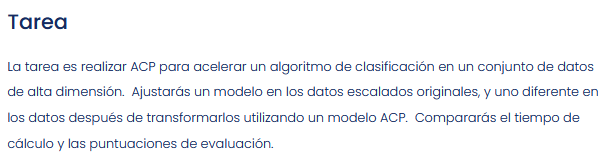

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier


Utiliza ACP para disminuir las dimensiones en este conjunto de datos a medida que se retiene el 95 % de la varianza.  Puedes hacer esto cuando instancies el ACP al dar el argumento “n_components=” un número flotante entre 0 y 1.

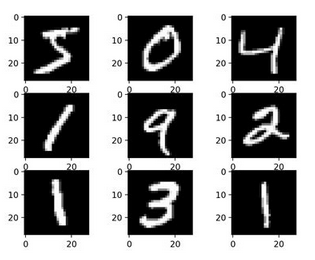

#1. Cargar datos

In [2]:
# load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape

(70000, 784)

Ten en cuenta que puedes acceder a los datos X utilizando “mnist.data” y acceder al objetivo utilizando “mnist.target”.

In [3]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mnist.target.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

#2. Preparar los datos

Prepara los datos para el modelado.  Escala y aplica ACP a tus datos mientras se retiene el 95 % de la varianza.  Asegúrate de no filtrar ninguna información.

In [5]:
X = mnist.data
y = mnist.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [7]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=.95)

In [9]:
pca.fit(scaled_df)

PCA(n_components=0.95)

Crea un pipeline ACP con Standard Scaler

El ACP funciona bien en un pipeline para simplificar nuestro código y evitar una fuga de datos. Siempre recuerda escalar los datos de aplicar ACP.


In [10]:
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

#3. Crea 2 modelos KNN. 

   a. Uno que utilice los datos transformados en ACP para predecir qué número muestra cada imagen.

   b. Uno que utilice los datos originales sin la transformación en ACP (pero recuerda que todavía tienes que escalar los datos)

##**PCA Model**

In [24]:
knn = KNeighborsClassifier()
pca_model = make_pipeline(transformer, knn)
pca_model.fit(X_train, y_train)
pca_model_score = pca_model.score(X_test, y_test)
pca_model_score


0.846

###**No PCA Model**

In [25]:
knn = KNeighborsClassifier()
no_pca_model = make_pipeline(scaler, knn)
no_pca_model.fit(X_train, y_train)
no_pca_model_score = no_pca_model.score(X_test, y_test)
no_pca_model_score


0.9446857142857142

#4. Evalúa y compara los modelos.  

Utiliza celdas separadas para hacer predicciones utilizando cada modelo.  Incluye el comando mágico de celda “%%time” arriba de tus celdas cuando se hagan predicciones para ver qué modelo puede crear predicciones más rápido: el que está entrenado con datos ACP o el que está entrenado con datos sin ACP.  Evalúa ambos modelos utilizando múltiples métricas adecuadas.

 

“%%time” mostrará debajo de la celda un recuento del tiempo que tarda el código en ejecutarse en esa celda.

In [22]:
%%time
preds_pca = pca_model.predict(X_test)

CPU times: user 1.43 s, sys: 145 ms, total: 1.57 s
Wall time: 1.38 s


In [23]:
%%time
preds_no_pca = no_pca_model.predict(X_test)


CPU times: user 1min 42s, sys: 2.49 s, total: 1min 44s
Wall time: 1min 3s


#5. Responde las siguientes preguntas en un texto:

   a. ¿Qué modelo funcionó mejor en el conjunto de prueba?

- Segun lo aplicado, el modelo sin PCA tuvo un mejor puntaje en el conjunto de prueba.



   b. ¿Qué modelo fue el más rápido en hacer predicciones? 
- El modelo con PCA tardo 1,57 Segundos mientras que sin PCA tardo 1 minuto y 44 segundos.